### Spanish Translation A/B Test 

In [1]:
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl
# print(plt.style.available)
plt.style.use('ggplot')
import seaborn as sns

# plt.rc('figure', figsize=(20, 20))
%matplotlib inline
# https://matplotlib.org/users/style_sheets.html

# Fixing random state for reproducibility
np.random.seed(1)


#### Variables

* `date`: when users came to the site for the first time since test started 

* `conversion`: label, whether users converted or not. 

* `test`: users randomly split into test (1) or control (0)

Other variables are self-explanatory.

In [5]:
# load data 
test_table = pd.read_csv('data/Translation_Test/test_table.csv')
test_table.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [11]:
test_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [14]:
test_table.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [6]:
user_table = pd.read_csv('data/Translation_Test/user_table.csv')
user_table.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [18]:
user_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [19]:
user_table.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [29]:
# check if there are duplicated user_ids 
len(test_table['user_id'].unique()) == len(test_table)


True

In [30]:
len(user_table['user_id'].unique()) == len(user_table)

True

In [31]:
# check if ids in two tables are the same 
len(test_table) - len(user_table)
# test table has more user ids 

454

In [62]:
data = pd.merge(test_table, user_table, how = 'left', on = 'user_id')
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [63]:
data['date'] = pd.to_datetime(data['date'])

In [64]:
def convert_category(data, columns):
    for column in columns:
        data[column] = data[column].astype('category')
convert_category(data, ['source', 'device', 'browser_language', 'ads_channel', 
                        'browser', 'sex', 'country'])


In [65]:
data.describe()

,user_id,conversion,test,age
count,453321.000000,453321.000000,453321.000000,452867.000000
mean,499937.514728,0.049579,0.476446,27.130740
std,288665.193436,0.217073,0.499445,6.776678
min,1.000000,0.000000,0.000000,18.000000
25%,249816.000000,0.000000,0.000000,22.000000
50%,500019.000000,0.000000,0.000000,26.000000
75%,749522.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [66]:
# frequency table for categorical variables 
def cross_table(data, cols):
    for col in cols:
        print(pd.crosstab(index = data[col], columns = 'ratio', normalize = True))
        print('\n\n')
cross_table(data, ['source', 'device', 'browser_language', 'ads_channel', 
                        'browser', 'sex', 'country'])

col_0      ratio
source          
Ads     0.401210
Direct  0.200375
SEO     0.398415



col_0      ratio
device          
Mobile  0.445062
Web     0.554938



col_0                ratio
browser_language          
EN                0.139277
ES                0.832847
Other             0.027876



col_0           ratio
ads_channel          
Bing         0.075265
Facebook     0.376216
Google       0.374869
Other        0.022807
Yahoo        0.150844



col_0           ratio
browser              
Android_App  0.342219
Chrome       0.224849
FireFox      0.089927
IE           0.136140
Iphone_App   0.102843
Opera        0.013434
Safari       0.090587



col_0     ratio
sex            
F      0.415976
M      0.584024



col_0           ratio
country              
Argentina    0.103194
Bolivia      0.024564
Chile        0.043582
Colombia     0.119373
Costa Rica   0.011723
Ecuador      0.035099
El Salvador  0.018052
Guatemala    0.033398
Honduras     0.018919
Mexico       0.283712
Nicaragua    0

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
user_id             453321 non-null int64
date                453321 non-null datetime64[ns]
source              453321 non-null category
device              453321 non-null category
browser_language    453321 non-null category
ads_channel         181877 non-null category
browser             453321 non-null category
conversion          453321 non-null int64
test                453321 non-null int64
sex                 452867 non-null category
age                 452867 non-null float64
country             452867 non-null category
dtypes: category(7), datetime64[ns](1), float64(1), int64(3)
memory usage: 23.8 MB


,country,converted_rate
0,Argentina,0.013994
1,Bolivia,0.048634
2,Chile,0.049704
3,Colombia,0.051332
4,Costa Rica,0.053494
5,Ecuador,0.049072
6,El Salvador,0.050765
7,Guatemala,0.049653
8,Honduras,0.049253
9,Mexico,0.050341


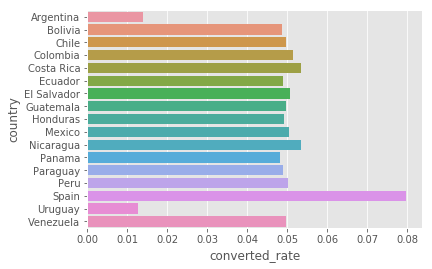

In [76]:

def group_plot(df, bys, col):
#     fig, axes = plt.subplots(len(bys), 1)
    for i, by in enumerate(bys):
        g = df.groupby(by)[col].mean().reset_index()
        g.rename(columns = {col: 'converted_rate'}, inplace = True)
        sns.barplot(x = 'converted_rate', y = by, data = g, orient='h')

    return g
group_plot(data, ['country'], 'conversion')